Have obtained the tf/idf matrix, we can now train the model

In [1]:
import logging, importlib, sys, tqdm
import pandas as pd
import os, re, time
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearnex import patch_sklearn 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from _pckle import save_pickle_object, load_pickle_object
from _logging import set_logging
from _graph import histplot_count, histplot_range_count
from _metrics import display_metrics
from _utility import gl

set_logging(logging)
X_tfidf = load_pickle_object(gl.pkl_X_tfidf)
df_labels = load_pickle_object(gl.pkl_df_edInput)
#improve performance of SCM
patch_sklearn()

2023-01-05 20:39:38,995 | INFO : Loading pickle file from: pickle\pkl_X_tfidf.pkl
2023-01-05 20:39:39,000 | INFO : Loading pickle file from: pickle\pkl_df_edInput.pkl


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
df_y = df_labels[gl.edInput]
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_y, test_size = 0.25, stratify=df_y)

In [3]:
t = time.time()
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)
training_time = time.time() - t
print(f"train time: {training_time}" )
save_pickle_object(classifier, gl.pkl_classifier_SVM)


train time: 64.62293100357056
2023-01-05 20:40:43,775 | INFO : Saving pickle file from: pickle\pkl_classifier_SVM.pkl


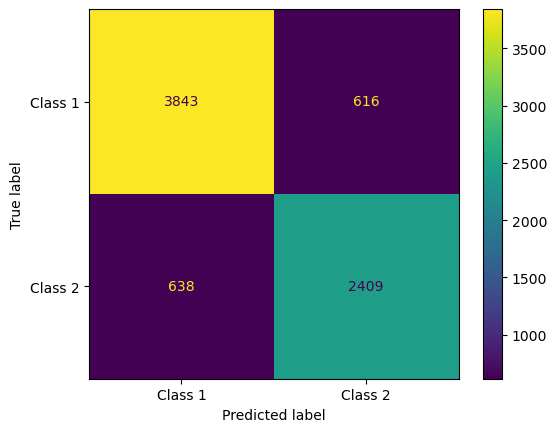

              precision    recall  f1-score   support

     Class 1       0.86      0.86      0.86      4459
     Class 2       0.80      0.79      0.79      3047

    accuracy                           0.83      7506
   macro avg       0.83      0.83      0.83      7506
weighted avg       0.83      0.83      0.83      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.65.


In [4]:
y_pred = classifier.predict(X_test)
display_metrics(y_test, y_pred)

In [5]:
t = time.time()
classifier = SVC(kernel='linear', class_weight="balanced")
classifier.fit(X_train, y_train)
training_time = time.time() - t
print(f"train time: {training_time}" )
save_pickle_object(classifier, gl.pkl_classifier_balanced_SVM)

train time: 59.97465491294861
2023-01-05 20:41:51,245 | INFO : Saving pickle file from: pickle\pkl_classifier_balanced_SVM.pkl


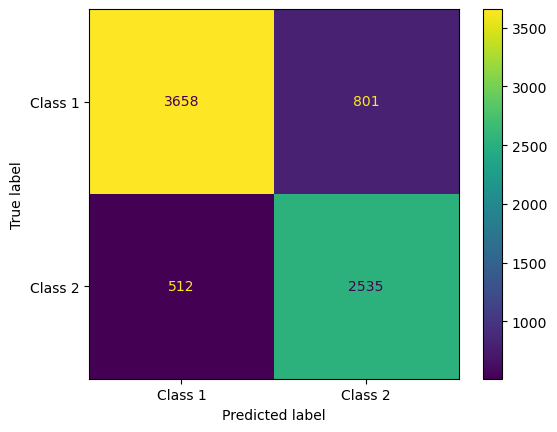

              precision    recall  f1-score   support

     Class 1       0.88      0.82      0.85      4459
     Class 2       0.76      0.83      0.79      3047

    accuracy                           0.83      7506
   macro avg       0.82      0.83      0.82      7506
weighted avg       0.83      0.83      0.83      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.64.


In [6]:
y_pred = classifier.predict(X_test)
display_metrics(y_test, y_pred)

The results are very similar to the baseline solution. There is no overall improvement in using class-weight = "balanced".